# HandWrittenClassifier

Handwritten Digit Recognition using k neighbors classifier.

# MNIST dataset

MNIST is a collection of handwritten digits from 0-9. Image of size 28 X 28

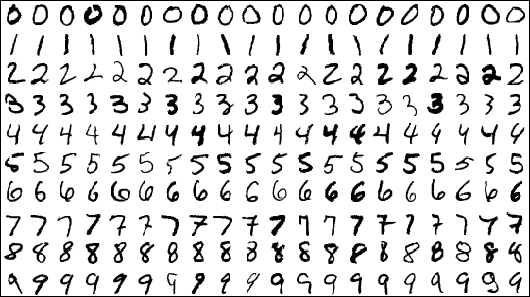

Importing required python modules

    1) pandas ,PIL and numpy for reading data files and saving the results
    2) matplotlib and seaborn for plotting graphs to visualise data
    3) data_load for loading data and labels
    4) Get_Euclidian_Dis and KNN holds the model itself
    5) confusion_matrix and plot_confusion_matrix to construct and plot the confusion matrix

In [20]:
import pandas as pd 
from PIL import Image
import numpy as np

from data_loader import data_load_with_LOOCV
from Knn import Get_Euclidian_Dis
from Knn import KNN

from confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from collections import Counter

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Loading The Datasets

Importing data from files the data consists of :
   
    1) Training data : 2400 images for handwritten digits.
    2) Testing data : 200 images for handwritten digits.
    3) 2 txt files that hold the labels of the data.


In [2]:
train_path =  "../Task Dataset/Train/Training Labels.txt"
test_path =  "../Task Dataset/Test/test Labels.txt"


Training_images ,testing_images ,training_label, testing_label = data_load_with_LOOCV(train_path,test_path)

# Data Visualisation

In [3]:
num_of_classes = len(Training_images)
num_of_training_data = len(Training_images[0]) * num_of_classes
print("The number of classes in training data   : ",num_of_classes)
print("The lenght of training data   : ",num_of_training_data)
print("The lenght of training labels : ",len(training_label))
print("The lenght of testing data    : ",len(testing_images))
print("The lenght of testing labels  : ",len(testing_label))

The number of classes in training data   :  10
The lenght of training data   :  2400
The lenght of training labels :  2400
The lenght of testing data    :  200
The lenght of testing labels  :  200


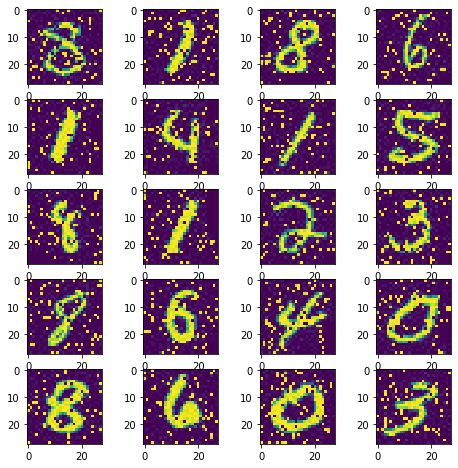

The shape of the images :  (28, 28)


In [4]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
i=1
for img in Training_images[0] [:20] :
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    i +=1
plt.show(block=True)

print("The shape of the images : ",Training_images[0][0].shape)

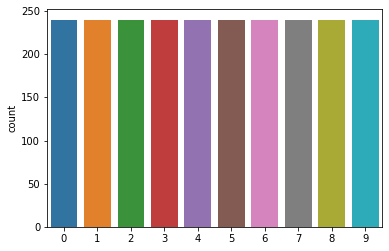

In [5]:
g = sn.countplot(training_label)

The Training datasets were homogeneous and packed into 10 packs each pack has 240 images.

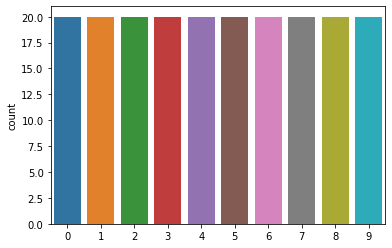

In [6]:
g = sn.countplot(testing_label)

The Testing datasets were homogeneous and packed into 10 packs each pack has 20 images.

# Test K-Nearest Neighbor (KNN) classifier

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. Here we used the KNN algorithm to classify the hand-written digits.


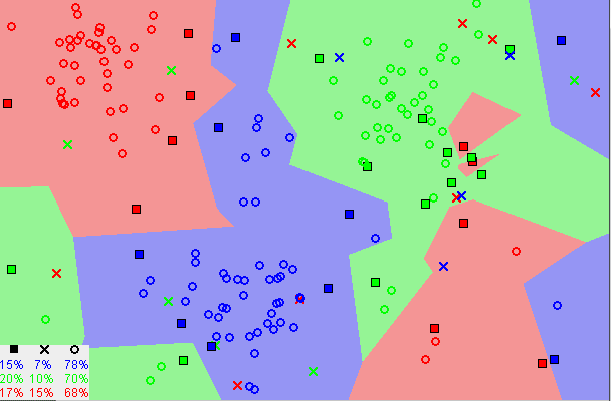

In [7]:
test_image = testing_images[0] 
print("Tested image label    : ",testing_label[0])
Prediction = KNN(Training_images,training_label,test_image,k=11)
print("Predicted image label : ",Prediction)

Tested image label    :  0
Predicted image label :  0


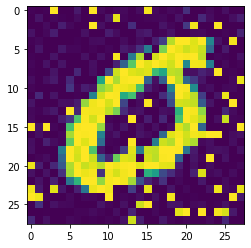

In [8]:
#Show test image
plt.imshow(test_image)

In [9]:
correct=0
total = 0
for i in range(len(testing_images)):
    predict = KNN(Training_images,training_label,testing_images[i],k=53)
    if predict == int(testing_label[i]):
        correct +=1    
    total +=1


print("Testing Accuracy : ",(correct/total) *100.0)

Testing Accuracy :  81.5


# Improving The Model Using  leave-one-out cross Validation

Cross-validation, or k-fold cross-validation, is a procedure used to estimate the performance of a machine learning algorithm when making predictions on data not used during the training of the model.

The cross-validation has a single hyperparameter “k” that controls the number of subsets that a dataset is split into. Once split, each subset is given the opportunity to be used as a test set while all other subsets together are used as a training dataset.

Leave-one-out cross-validation, or LOOCV, is a configuration of k-fold cross-validation where k is set to the number of examples in the dataset.

In [10]:
# Make a dict to hold the K and its accuracy
max_K = 100
min_K = 10
k_Dic = dict()
for k in range(min_K,max_K+1,1):
    k_Dic.update({k : []})
print(k_Dic)

{10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: []}


In [11]:
correct=0
start = 0
end = 0
best_K = []
all_label = []
total = 0
x =0
for validate in Training_images :
    train = Training_images.copy() 
    del train[x]
    x+=1
    val_label = training_label.copy()
    end = start+len(validate)
    test_val_label = val_label[start:end].copy()
    del val_label[start:end]
    start = end
    all_label.append(test_val_label)
    distance = []
    for val in validate :
        Euclidian_Dis = Get_Euclidian_Dis(train,val_label,val)
        distance.append(Euclidian_Dis)

    
    best_K.append(distance)
    print("Finished Validation Round number : ",x)
    

Finished Validation Round number :  1
Finished Validation Round number :  2
Finished Validation Round number :  3
Finished Validation Round number :  4
Finished Validation Round number :  5
Finished Validation Round number :  6
Finished Validation Round number :  7
Finished Validation Round number :  8
Finished Validation Round number :  9
Finished Validation Round number :  10


In [14]:
correct=0
total=0
validation_acc =[]
accuracy = 0
for k in range(min_K,max_K+1,1):
    for i in range(len(best_K)) :
        for j in range(len(best_K[i])) :
            result = []
            for x in best_K[i][j] [:k] :
                result.append(x[1])
                predected_class = Counter(result).most_common(1) [0] [0]
                if all_label[i][j] == predected_class :
                    correct +=1
                total +=1
            validation_acc.append(correct/total)
    accuracy = sum(validation_acc) / len(validation_acc)
    k_Dic[k].append(accuracy) 
    print("Finished k : ",k , " with accuracy : ",accuracy * 100.0)
            

Finished k :  10  with accuracy :  88.0040066091024
Finished k :  11  with accuracy :  87.86221394723177
Finished k :  12  with accuracy :  87.79863883186917
Finished k :  13  with accuracy :  87.75672650110691
Finished k :  14  with accuracy :  87.72594518410473
Finished k :  15  with accuracy :  87.70140247486293
Finished k :  16  with accuracy :  87.68040458675608
Finished k :  17  with accuracy :  87.66159985375657
Finished k :  18  with accuracy :  87.64414192037087
Finished k :  19  with accuracy :  87.62762057002853
Finished k :  20  with accuracy :  87.61152896363889
Finished k :  21  with accuracy :  87.59559980557144
Finished k :  22  with accuracy :  87.57962965206985
Finished k :  23  with accuracy :  87.56349544487321
Finished k :  24  with accuracy :  87.5471316281074
Finished k :  25  with accuracy :  87.53054345247256
Finished k :  26  with accuracy :  87.51372242708587
Finished k :  27  with accuracy :  87.49670616250458
Finished k :  28  with accuracy :  87.4795177533

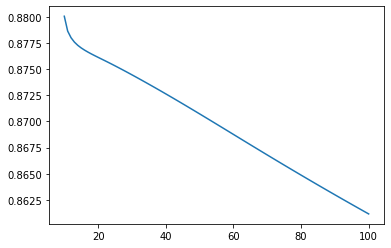

The Best K value for this model is :  10
The Best Validation accuarcy value for this model is :  [0.880040066091024]


In [15]:
x = list(k_Dic.values()  )
y = list(k_Dic.keys())
plt.plot(y ,x)
plt.show()
Best_K_Value = max(k_Dic, key=k_Dic.get)
print("The Best K value for this model is : ",Best_K_Value)
print("The Best Validation accuarcy value for this model is : ",k_Dic.get(Best_K_Value))

# Testing the model with best K

By applying LOOCV, we get that K equals 10 was the best choice.

In [16]:
correct=0
total = 0
predict_list = []
for i in range(len(testing_images)):
    predict= KNN(Training_images,training_label,testing_images[i],k=10)
    predict_list.append(predict)
    if predict == int(testing_label[i]):
        correct +=1    
    total +=1

print("Testing Accuracy :",(correct/total) * 100.0)

Testing Accuracy : 87.5


# Confusion Matrix

In [17]:
cm = confusion_matrix(predict_list ,testing_label )

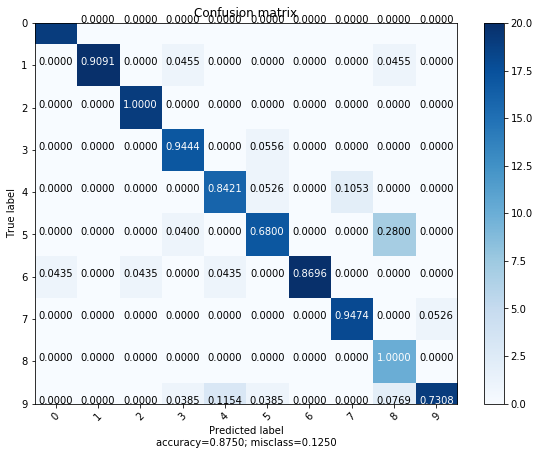

In [21]:
classes = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm,classes)